In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
from scipy.io.wavfile import read

import features as fts
import common as common

%matplotlib inline

In [2]:
current_dir = os.getcwd()
data_dir = os.path.join(current_dir, '..', 'data')
features_dir = os.path.join(data_dir, 'features')

print 'Current directory:\t', current_dir
print 'Data directory:\t\t', data_dir
print 'Features directory:\t', features_dir

Current directory:	/Users/martin.majer/PycharmProjects/BP/scripts
Data directory:		/Users/martin.majer/PycharmProjects/BP/scripts/../data
Features directory:	/Users/martin.majer/PycharmProjects/BP/scripts/../data/features


In [3]:
data = common.load_features_data(features_dir)

In [4]:
sample = '3-1-7.wav'

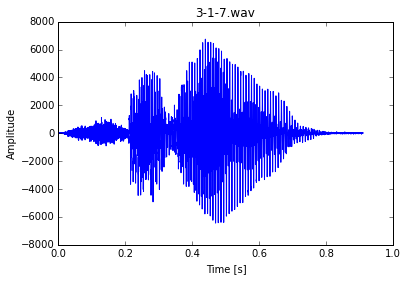

In [5]:
rate, signal = read(os.path.join(data_dir, 'segmented', sample))
time = fts.get_wav_time(signal, rate)

plt.plot(time, signal)
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.title(sample)
plt.show()

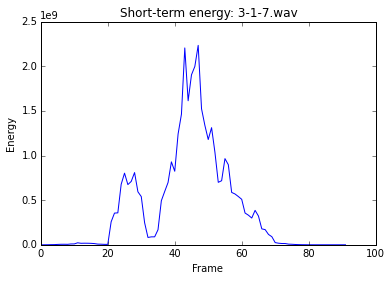

In [6]:
ste = data['ste_10_10'][sample]

plt.plot(ste)
plt.xlabel('Frame')
plt.ylabel('Energy')
plt.title('Short-term energy: ' + sample)
plt.show()

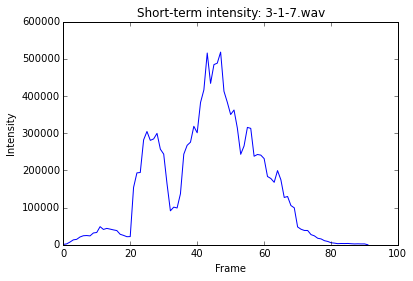

In [7]:
sti = data['sti_10_10'][sample]

plt.plot(sti)
plt.xlabel('Frame')
plt.ylabel('Intensity')
plt.title('Short-term intensity: ' + sample)
plt.show()

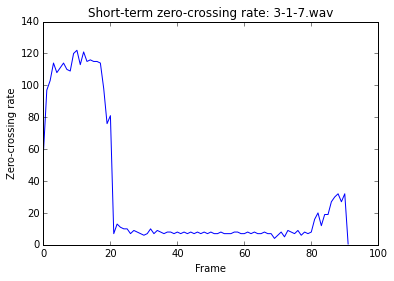

In [8]:
stzcr = data['stzcr_10_10'][sample]

plt.plot(stzcr)
plt.xlabel('Frame')
plt.ylabel('Zero-crossing rate')
plt.title('Short-term zero-crossing rate: ' + sample)
plt.show()

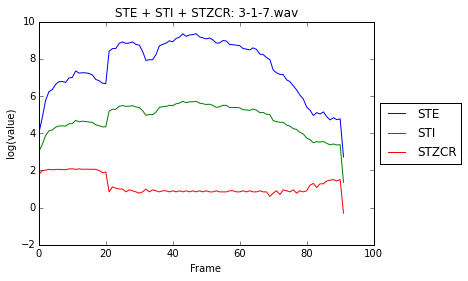

In [9]:
ste_sti_stzcr = data['ste_sti_stzcr_10_10'][sample]

plt.plot(np.log10(ste_sti_stzcr[:,0]), label='STE')
plt.plot(np.log10(ste_sti_stzcr[:,1]), label='STI')
plt.plot(np.log10(ste_sti_stzcr[:,2]), label='STZCR')
plt.xlabel('Frame')
plt.ylabel('log(value)')
plt.title('STE + STI + STZCR: ' + sample)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

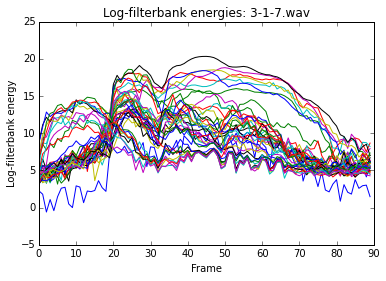

In [10]:
log_fb_en = data['log_fb_en_25_10_ham'][sample]

plt.plot(log_fb_en)
plt.xlabel('Frame')
plt.ylabel('Log-filterbank energy')
plt.title('Log-filterbank energies: ' + sample)
plt.show()

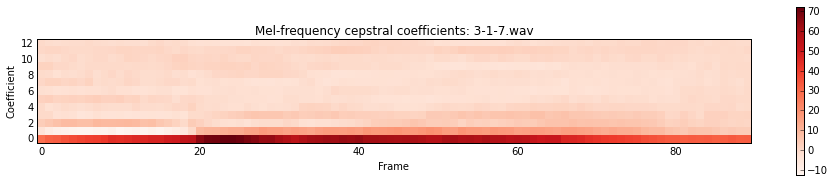

In [11]:
mfcc = data['mfcc_25_10_ham'][sample]

def plot_heatmap(features):
    plt.figure(figsize=(16,3))
    plt.imshow(features.T, interpolation='nearest', cmap='Reds')
    plt.colorbar()
    plt.gca().invert_yaxis()
    plt.xlabel('Frame')
    plt.ylabel('Coefficient')
    plt.tick_params(axis='both', which='both', bottom='off', top='off', left='off', right='off')
    plt.title('Mel-frequency cepstral coefficients: ' + sample)
    plt.show()
    
plot_heatmap(mfcc)